In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
img= cv2.imread('./testIMG/Shraddha-Kapoor.jpg')
img.shape

(800, 800, 3)

In [3]:
img

array([[[ 79, 132, 205],
        [ 79, 132, 205],
        [ 81, 134, 207],
        ...,
        [ 72, 125, 198],
        [ 72, 125, 198],
        [ 72, 125, 198]],

       [[ 79, 132, 205],
        [ 80, 133, 206],
        [ 80, 133, 206],
        ...,
        [ 71, 124, 197],
        [ 71, 124, 197],
        [ 71, 124, 197]],

       [[ 81, 134, 207],
        [ 80, 133, 206],
        [ 80, 133, 206],
        ...,
        [ 72, 126, 197],
        [ 72, 126, 197],
        [ 72, 126, 197]],

       ...,

       [[164, 204, 246],
        [164, 204, 246],
        [164, 203, 247],
        ...,
        [139, 182, 225],
        [141, 183, 226],
        [141, 183, 226]],

       [[165, 205, 247],
        [164, 204, 246],
        [164, 203, 247],
        ...,
        [140, 183, 226],
        [141, 183, 226],
        [142, 184, 227]],

       [[166, 206, 248],
        [165, 205, 247],
        [165, 204, 248],
        ...,
        [140, 183, 226],
        [142, 184, 227],
        [143, 185, 228]]

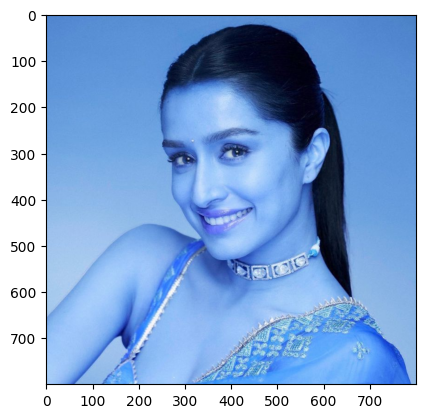

In [4]:
plt.imshow(img)

In [5]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(800, 800)

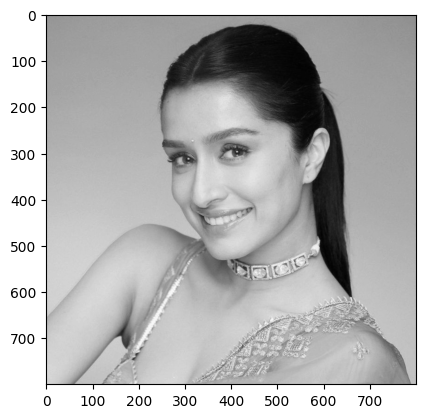

In [6]:
plt.imshow(gray, cmap= 'gray')
plt.show()

In [6]:
face_cascade= cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

In [7]:
faces= face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[154, 148, 404, 404]])

In [8]:
(x, y, w, h)= faces[0]
x, y, w, h

(154, 148, 404, 404)

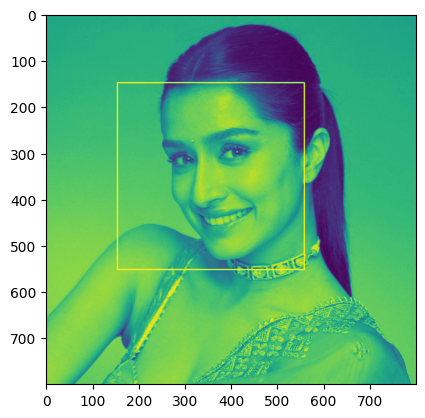

In [9]:
face_img= cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0), 2)
plt.imshow(face_img)

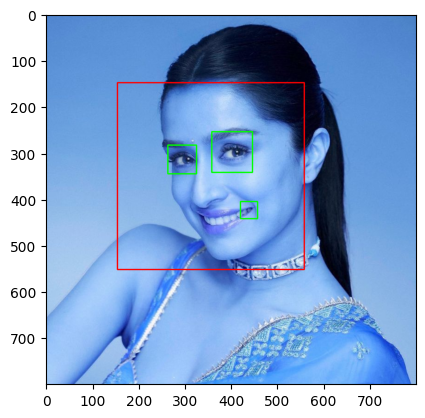

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

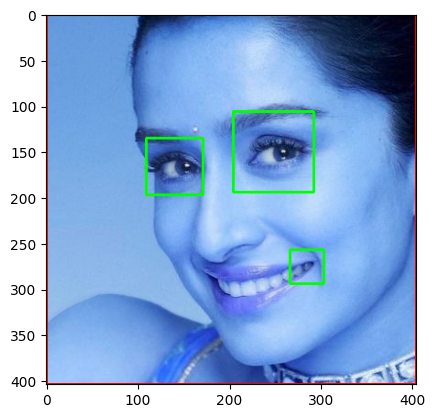

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def croppedIMGif2eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

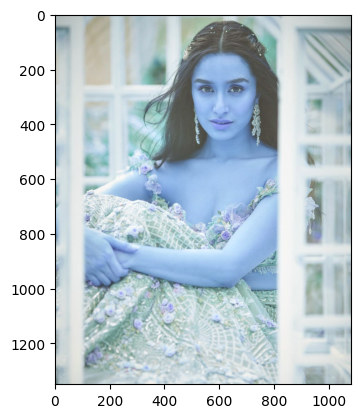

In [13]:
org_img= cv2.imread('./testIMG/2.jpeg')
plt.imshow(org_img)

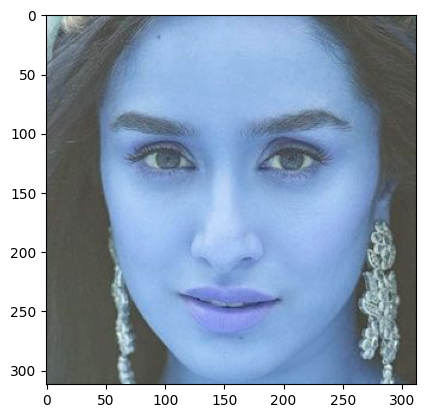

In [14]:
test_img= croppedIMGif2eyes('./testIMG/2.jpeg')
plt.imshow(test_img)

In [15]:
test_img

array([[[209, 222, 230],
        [205, 221, 228],
        [201, 219, 226],
        ...,
        [ 75,  96,  88],
        [ 89, 116, 107],
        [102, 136, 126]],

       [[210, 223, 231],
        [206, 222, 229],
        [202, 221, 228],
        ...,
        [ 96, 112, 105],
        [ 94, 118, 110],
        [ 95, 126, 117]],

       [[208, 224, 231],
        [207, 223, 230],
        [204, 223, 230],
        ...,
        [ 99, 113, 107],
        [ 82, 103,  95],
        [ 85, 112, 103]],

       ...,

       [[ 88,  95,  90],
        [ 90,  97,  92],
        [ 91,  98,  93],
        ...,
        [ 73,  70,  65],
        [ 72,  69,  64],
        [ 74,  71,  63]],

       [[ 87,  94,  89],
        [ 89,  96,  91],
        [ 91,  98,  93],
        ...,
        [ 69,  69,  63],
        [ 71,  68,  63],
        [ 74,  71,  63]],

       [[ 89,  95,  90],
        [ 92,  98,  93],
        [ 93,  99,  94],
        ...,
        [ 72,  72,  66],
        [ 74,  71,  66],
        [ 76,  73,  65]]

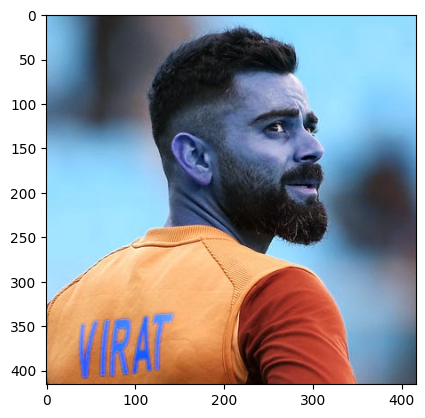

In [16]:
org_1eye= cv2.imread('./testIMG/0x0.jpg')
plt.imshow(org_1eye)

In [17]:
cropped_1eye= croppedIMGif2eyes('./testIMG/0x0.jpg')
cropped_1eye

#expected not to show any faces as single eye is detected

In [18]:
path_to_data= './dataset/'
path_to_croppedIMG= './dataset/cropped'

In [19]:
import os

img_dirs= []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./dataset/kartik_aryaan',
 './dataset/kiara_advani',
 './dataset/shraddha_kapoor',
 './dataset/siddharth_malhotra',
 './dataset/virat_kohli']

In [21]:
import shutil

if os.path.exists(path_to_croppedIMG):
    shutil.rmtree(path_to_croppedIMG)
os.mkdir(path_to_croppedIMG)

In [22]:
croppedIMG_dirs= []
filename_dict= {}

for img_dir in img_dirs:
    count= 1
    IMGnames= img_dir.split('/')[-1]
    print(IMGnames)
    
    filename_dict[IMGnames]= []
    
    for entry in os.scandir(img_dir):
        try:
            roi_color= croppedIMGif2eyes(entry.path)
            if roi_color is not None:
                cropped_folder= path_to_croppedIMG + IMGnames
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    croppedIMG_dirs.append(cropped_folder)
                    print('Generating CroppedIMGs at: ', cropped_folder)
                cropped_filename= IMGnames + str(count) + '.png'
                cropped_filepath= cropped_folder + '/' + cropped_filename

                cv2.imwrite(cropped_filepath, roi_color)
                filename_dict[IMGnames].append(cropped_filepath)
                count+=1
        except:
            print('errored: ', count)
print('Done Cropping Images')

kartik_aryaan
Generating CroppedIMGs at:  ./dataset/croppedkartik_aryaan
errored:  15
errored:  66
kiara_advani
Generating CroppedIMGs at:  ./dataset/croppedkiara_advani
shraddha_kapoor
Generating CroppedIMGs at:  ./dataset/croppedshraddha_kapoor
errored:  61
siddharth_malhotra
Generating CroppedIMGs at:  ./dataset/croppedsiddharth_malhotra
errored:  55
virat_kohli
errored:  1
Generating CroppedIMGs at:  ./dataset/croppedvirat_kohli
Done Cropping Images


In [23]:
crIMGdict= filename_dict

In [24]:
crIMGdict

{'kartik_aryaan': ['./dataset/croppedkartik_aryaan/kartik_aryaan1.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan2.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan3.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan4.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan5.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan6.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan7.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan8.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan9.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan10.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan11.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan12.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan13.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan14.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan15.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan16.png',
  './dataset/croppedkartik_aryaan/kartik_aryaan17.png',
  './dataset/croppedkartik_aryaan/kartik

# Wavelet Transformation

In [25]:
import pywt

In [26]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

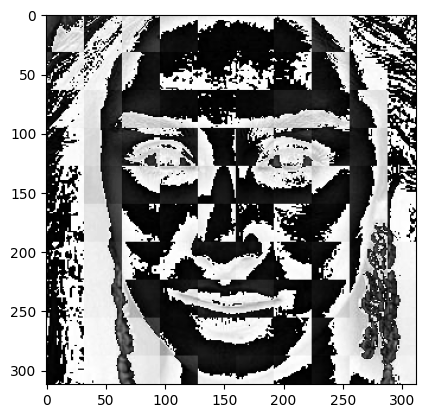

In [27]:
test1= w2d(test_img, 'db1', 5)
plt.imshow(test1, cmap='gray')

In [28]:
classDict= {}
count=0

for celebNames in crIMGdict.keys():
    classDict[celebNames]= count
    count= count+1
classDict

{'kartik_aryaan': 0,
 'kiara_advani': 1,
 'shraddha_kapoor': 2,
 'siddharth_malhotra': 3,
 'virat_kohli': 4}

In [29]:
X= []
y= []

for celebNames, trainingFiles in crIMGdict.items():
    for trainingIMG in trainingFiles:
        IMG= cv2.imread(trainingIMG)
        if IMG is None:
            continue
        scaledRawIMG= cv2.resize(IMG, (32, 32))
        IMGhar= w2d(img, 'db1', 5)
        scaledIMGhar= cv2.resize(IMGhar, (32, 32))
        stackedIMG= np.vstack((scaledRawIMG.reshape(32*32*3, 1), scaledIMGhar.reshape(32*32, 1)))
        X.append(stackedIMG)
        y.append(classDict[celebNames])

In [30]:
len(X)

299

In [31]:
X= np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(299, 4096)

# Training Model

In [32]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.75

In [40]:
X_test.shape

(60, 4096)

In [42]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.53      0.73      0.62        11
           2       0.88      0.71      0.79        21
           3       0.82      0.82      0.82        11
           4       1.00      0.83      0.91         6

    accuracy                           0.78        60
   macro avg       0.81      0.80      0.80        60
weighted avg       0.81      0.78      0.79        60



In [49]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [64]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [0.1, 1, 10, 100, 1000],
            'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [30, 40, 50, 60, 100, 150, 170],
            'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10, 20]
        }
    }
}

In [65]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score  \
0                  svm    0.803191   
1        random_forest    0.539982   
2  logistic_regression    0.724025   

                                         best_params  
0  {'svc__C': 0.1, 'svc__gamma': 1, 'svc__kernel'...  
1  {'decisiontreeclassifier__criterion': 'entropy...  
2                       {'logisticregression__C': 1}

In [66]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=0.1, gamma=1, kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('decisiontreeclassifier',
                  DecisionTreeClassifier(criterion='entropy', max_depth=20))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [69]:
print("Best score for SVM: ", best_estimators['svm'].score(X_test,y_test))
print("best scores for random forest: ", best_estimators['random_forest'].score(X_test,y_test))
print("best scorees for logistic regression: ", best_estimators['logistic_regression'].score(X_test,y_test))

Best score for SVM:  0.9166666666666666
best scores for random forest:  0.8833333333333333
best scorees for logistic regression:  0.9166666666666666


In [94]:
best_clf = best_estimators['logistic_regression']

In [95]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.88      1.00      0.93        14
           2       1.00      0.84      0.91        19
           3       0.86      0.92      0.89        13
           4       0.86      1.00      0.92         6

    accuracy                           0.92        60
   macro avg       0.92      0.93      0.92        60
weighted avg       0.93      0.92      0.92        60



Text(95.72222222222221, 0.5, 'Truth')

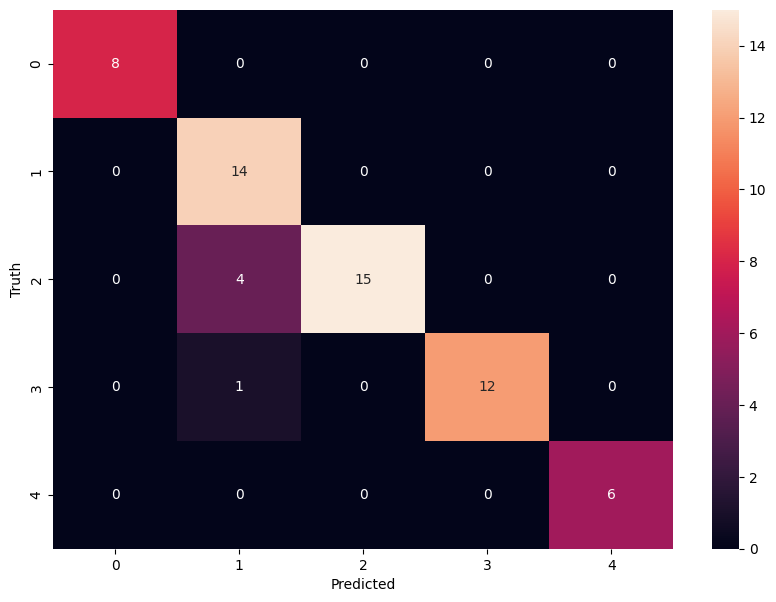

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
classDict

{'kartik_aryaan': 0,
 'kiara_advani': 1,
 'shraddha_kapoor': 2,
 'siddharth_malhotra': 3,
 'virat_kohli': 4}

In [91]:
print(classification_report(y_test, best_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.74      1.00      0.85        14
           2       1.00      0.79      0.88        19
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         6

    accuracy                           0.92        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.92      0.92        60



In [84]:
!pip install joblib
import joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [96]:
joblib.dump(best_clf, './exports/final_lr.pkl') 

['./exports/final_lr.pkl']

In [97]:
import json
with open("classDict.json","w") as f:
    f.write(json.dumps(classDict))